### Í∏∞Î≥∏ Search Tool graph

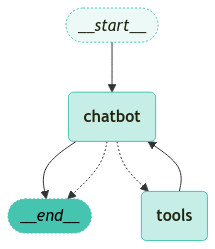

In [1]:
from typing import Annotated
from typing_extensions import TypedDict

from langchain_teddynote.tools.tavily import TavilySearch
from langchain_ollama import ChatOllama
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_teddynote.graphs import visualize_graph


########## 1. ÏÉÅÌÉú Ï†ïÏùò ##########
# ÏÉÅÌÉú Ï†ïÏùò
class State(TypedDict):
    # Î©îÏãúÏßÄ Î™©Î°ù Ï£ºÏÑù Ï∂îÍ∞Ä
    messages: Annotated[list, add_messages]


########## 2. ÎèÑÍµ¨ Ï†ïÏùò Î∞è Î∞îÏù∏Îî© ##########
# ÎèÑÍµ¨ Ï¥àÍ∏∞Ìôî
tool = TavilySearch(max_results=3)
# ÎèÑÍµ¨ Î™©Î°ù Ï†ïÏùò
tools = [tool]

# LLM Ï¥àÍ∏∞Ìôî
llm = ChatOllama(model="llama3.1:8b")
# ÎèÑÍµ¨ÏôÄ LLM Í≤∞Ìï©
llm_with_tools = llm.bind_tools(tools)


########## 3. ÎÖ∏Îìú Ï∂îÍ∞Ä ##########
# Ï±óÎ¥á Ìï®Ïàò Ï†ïÏùò
def chatbot(state: State):
    # Î©îÏãúÏßÄ Ìò∏Ï∂ú Î∞è Î∞òÌôò
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


# ÏÉÅÌÉú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
graph_builder = StateGraph(State)
# Ï±óÎ¥á ÎÖ∏Îìú Ï∂îÍ∞Ä
graph_builder.add_node("chatbot", chatbot)

# ÎèÑÍµ¨ ÎÖ∏Îìú ÏÉùÏÑ± Î∞è Ï∂îÍ∞Ä
tool_node = ToolNode(tools=tools)
# ÎèÑÍµ¨ ÎÖ∏Îìú Ï∂îÍ∞Ä
graph_builder.add_node("tools", tool_node)

# Ï°∞Í±¥Î∂Ä Ïó£ÏßÄ
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)

########## 4. Ïó£ÏßÄ Ï∂îÍ∞Ä ##########
# tools > chatbot
graph_builder.add_edge("tools", "chatbot")
# START > chatbot
graph_builder.add_edge(START, "chatbot")
# chatbot > END
graph_builder.add_edge("chatbot", END)

########## 5. Í∑∏ÎûòÌîÑ Ïª¥ÌååÏùº ##########
# Î©îÎ™®Î¶¨ Ï†ÄÏû•ÏÜå Ï¥àÍ∏∞Ìôî
memory = MemorySaver()
# Í∑∏ÎûòÌîÑ ÎπåÎçî Ïª¥ÌååÏùº
graph = graph_builder.compile(checkpointer=memory)

########## 6. Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ##########
# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
visualize_graph(graph)


### 1. Ï§ëÍ∞Ñ Îã®Í≥ÑÏùò ÏÉÅÌÉú(State) ÏàòÎèô ÏóÖÎç∞Ïù¥Ìä∏

##### ÌäπÏ†ï Îã®Í≥Ñ Î©îÏÑ∏ÏßÄ ÏàòÏ†ïÌïòÍ∏∞

In [2]:
from langchain_core.runnables import RunnableConfig

# ÏßàÎ¨∏
question = "LangGraph Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ Ï°∞ÏÇ¨ÌïòÏó¨ ÏïåÎ†§Ï£ºÏÑ∏Ïöî!"

# Ï¥àÍ∏∞ ÏûÖÎ†• ÏÉÅÌÉúÎ•º Ï†ïÏùò
input = State(messages=[("user", question)])

# config ÏÑ§Ï†ï
config = RunnableConfig(
    configurable={"thread_id": "1"},  # Ïä§Î†àÎìú ID ÏÑ§Ï†ï
)

* Ïö∞ÏÑ† Ï±ÑÎÑêÎ™©Î°ùÏùÑ Ï∂úÎ†•ÌïòÏó¨ `interrupt_before` ÏôÄ `interrupt_after` Î•º Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî Î™©Î°ùÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.

In [3]:
# Í∑∏ÎûòÌîÑ Ï±ÑÎÑê Î™©Î°ù Ï∂úÎ†•
list(graph.channels)

['messages',
 '__start__',
 'chatbot',
 'tools',
 'branch:__start__:__self__:chatbot',
 'branch:__start__:__self__:tools',
 'branch:chatbot:__self__:chatbot',
 'branch:chatbot:__self__:tools',
 'branch:tools:__self__:chatbot',
 'branch:tools:__self__:tools',
 'start:chatbot',
 'branch:chatbot:tools_condition:tools']

In [6]:
# Í∑∏ÎûòÌîÑ Ïä§Ìä∏Î¶º Ìò∏Ï∂ú
events = graph.stream(
    input=input, config=config, interrupt_before=["tools"], stream_mode="values"
)

# Ïù¥Î≤§Ìä∏ Î∞òÎ≥µ Ï≤òÎ¶¨
for event in events:
    # Î©îÏãúÏßÄÍ∞Ä Ïù¥Î≤§Ìä∏Ïóê Ìè¨Ìï®Îêú Í≤ΩÏö∞
    if "messages" in event:
        # ÎßàÏßÄÎßâ Î©îÏãúÏßÄÏùò ÏòàÏÅú Ï∂úÎ†•
        event["messages"][-1].pretty_print()

================================ Human Message =================================

LangGraph Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ Ï°∞ÏÇ¨ÌïòÏó¨ ÏïåÎ†§Ï£ºÏÑ∏Ïöî!
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (ce99c423-9851-4faf-b2d3-78ac86680856)
 Call ID: ce99c423-9851-4faf-b2d3-78ac86680856
  Args:
    query: LangGraph


In [7]:
# Í∑∏ÎûòÌîÑ ÏÉÅÌÉú Ïä§ÎÉÖÏÉ∑ ÏÉùÏÑ±
snapshot = graph.get_state(config)

# Í∞ÄÏû• ÏµúÍ∑º Î©îÏãúÏßÄ Ï∂îÏ∂ú
last_message = snapshot.values["messages"][-1]

# Î©îÏãúÏßÄ Ï∂úÎ†•
last_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (ce99c423-9851-4faf-b2d3-78ac86680856)
 Call ID: ce99c423-9851-4faf-b2d3-78ac86680856
  Args:
    query: LangGraph


In [8]:
modified_search_result = """[ÏàòÏ†ïÎêú Ïõπ Í≤ÄÏÉâ Í≤∞Í≥º] 
LangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.
LangGraphÎäî ÏÇ¨Ïù¥ÌÅ¥ ÌùêÎ¶Ñ, Ï†úÏñ¥ Í∞ÄÎä•ÏÑ±, ÏßÄÏÜçÏÑ±, ÌÅ¥ÎùºÏö∞Îìú Î∞∞Ìè¨ Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî Ïò§Ìîà ÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.

ÏûêÏÑ∏Ìïú ÌäúÌÜ†Î¶¨ÏñºÏùÄ [LangGraph ÌäúÌÜ†Î¶¨Ïñº](https://langchain-ai.github.io/langgraph/tutorials/) Í≥º
ÌÖåÎîîÎÖ∏Ìä∏Ïùò [Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº](https://wikidocs.net/233785) ÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî."""

print(modified_search_result)

[ÏàòÏ†ïÎêú Ïõπ Í≤ÄÏÉâ Í≤∞Í≥º] 
LangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.
LangGraphÎäî ÏÇ¨Ïù¥ÌÅ¥ ÌùêÎ¶Ñ, Ï†úÏñ¥ Í∞ÄÎä•ÏÑ±, ÏßÄÏÜçÏÑ±, ÌÅ¥ÎùºÏö∞Îìú Î∞∞Ìè¨ Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî Ïò§Ìîà ÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.

ÏûêÏÑ∏Ìïú ÌäúÌÜ†Î¶¨ÏñºÏùÄ [LangGraph ÌäúÌÜ†Î¶¨Ïñº](https://langchain-ai.github.io/langgraph/tutorials/) Í≥º
ÌÖåÎîîÎÖ∏Ìä∏Ïùò [Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº](https://wikidocs.net/233785) ÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.


In [9]:
# ÏàòÏ†ïÌïòÍ≥†Ïûê ÌïòÎäî `ToolMessage` Ïùò `tool_call_id` Ï∂îÏ∂ú
tool_call_id = last_message.tool_calls[0]["id"]
print(tool_call_id)

ce99c423-9851-4faf-b2d3-78ac86680856


In [10]:
from langchain_core.messages import AIMessage, ToolMessage

new_messages = [
    # LLM APIÏùò ÎèÑÍµ¨ Ìò∏Ï∂úÍ≥º ÏùºÏπòÌïòÎäî ToolMessage ÌïÑÏöî
    ToolMessage(
        content=modified_search_result,
        tool_call_id=tool_call_id,
    ),
    # LLMÏùò ÏùëÎãµÏóê ÏßÅÏ†ëÏ†ÅÏúºÎ°ú ÎÇ¥Ïö© Ï∂îÍ∞Ä
    # AIMessage(content=modified_search_result),
]

new_messages[-1].pretty_print()

================================= Tool Message =================================

[ÏàòÏ†ïÎêú Ïõπ Í≤ÄÏÉâ Í≤∞Í≥º] 
LangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.
LangGraphÎäî ÏÇ¨Ïù¥ÌÅ¥ ÌùêÎ¶Ñ, Ï†úÏñ¥ Í∞ÄÎä•ÏÑ±, ÏßÄÏÜçÏÑ±, ÌÅ¥ÎùºÏö∞Îìú Î∞∞Ìè¨ Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî Ïò§Ìîà ÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.

ÏûêÏÑ∏Ìïú ÌäúÌÜ†Î¶¨ÏñºÏùÄ [LangGraph ÌäúÌÜ†Î¶¨Ïñº](https://langchain-ai.github.io/langgraph/tutorials/) Í≥º
ÌÖåÎîîÎÖ∏Ìä∏Ïùò [Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº](https://wikidocs.net/233785) ÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.


##### StateGraphÏùò update_state Î©îÏÑúÎìú

In [11]:
graph.update_state(
    # ÏóÖÎç∞Ïù¥Ìä∏Ìï† ÏÉÅÌÉú ÏßÄÏ†ï
    config,
    # Ï†úÍ≥µÌï† ÏóÖÎç∞Ïù¥Ìä∏Îêú Í∞í. `State`Ïùò Î©îÏãúÏßÄÎäî "Ï∂îÍ∞Ä Ï†ÑÏö©"ÏúºÎ°ú Í∏∞Ï°¥ ÏÉÅÌÉúÏóê Ï∂îÍ∞ÄÎê®
    {"messages": new_messages},
    as_node="tools",
)

print("(ÏµúÍ∑º 1Í∞úÏùò Î©îÏãúÏßÄ Ï∂úÎ†•)\n")
print(graph.get_state(config).values["messages"][-1])

(ÏµúÍ∑º 1Í∞úÏùò Î©îÏãúÏßÄ Ï∂úÎ†•)

content='[ÏàòÏ†ïÎêú Ïõπ Í≤ÄÏÉâ Í≤∞Í≥º] \nLangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.\nLangGraphÎäî ÏÇ¨Ïù¥ÌÅ¥ ÌùêÎ¶Ñ, Ï†úÏñ¥ Í∞ÄÎä•ÏÑ±, ÏßÄÏÜçÏÑ±, ÌÅ¥ÎùºÏö∞Îìú Î∞∞Ìè¨ Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî Ïò§Ìîà ÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.\n\nÏûêÏÑ∏Ìïú ÌäúÌÜ†Î¶¨ÏñºÏùÄ [LangGraph ÌäúÌÜ†Î¶¨Ïñº](https://langchain-ai.github.io/langgraph/tutorials/) Í≥º\nÌÖåÎîîÎÖ∏Ìä∏Ïùò [Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº](https://wikidocs.net/233785) ÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.' id='c46889e7-f06f-4578-824c-91445825e487' tool_call_id='ce99c423-9851-4faf-b2d3-78ac86680856'


In [12]:
snapshot = graph.get_state(config)
snapshot.next

('chatbot',)

In [13]:
# `None`Îäî ÌòÑÏû¨ ÏÉÅÌÉúÏóê ÏïÑÎ¨¥Í≤ÉÎèÑ Ï∂îÍ∞ÄÌïòÏßÄ ÏïäÏùå
events = graph.stream(None, config, stream_mode="values")

# Ïù¥Î≤§Ìä∏ Î∞òÎ≥µ Ï≤òÎ¶¨
for event in events:
    # Î©îÏãúÏßÄÍ∞Ä Ïù¥Î≤§Ìä∏Ïóê Ìè¨Ìï®Îêú Í≤ΩÏö∞
    if "messages" in event:
        # ÎßàÏßÄÎßâ Î©îÏãúÏßÄÏùò ÏòàÏÅú Ï∂úÎ†•
        event["messages"][-1].pretty_print()

================================= Tool Message =================================

[ÏàòÏ†ïÎêú Ïõπ Í≤ÄÏÉâ Í≤∞Í≥º] 
LangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.
LangGraphÎäî ÏÇ¨Ïù¥ÌÅ¥ ÌùêÎ¶Ñ, Ï†úÏñ¥ Í∞ÄÎä•ÏÑ±, ÏßÄÏÜçÏÑ±, ÌÅ¥ÎùºÏö∞Îìú Î∞∞Ìè¨ Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî Ïò§Ìîà ÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.

ÏûêÏÑ∏Ìïú ÌäúÌÜ†Î¶¨ÏñºÏùÄ [LangGraph ÌäúÌÜ†Î¶¨Ïñº](https://langchain-ai.github.io/langgraph/tutorials/) Í≥º
ÌÖåÎîîÎÖ∏Ìä∏Ïùò [Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº](https://wikidocs.net/233785) ÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.
================================== Ai Message ==================================

LangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌïòÎäî Ïò§Ìîà ÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§. LangGraphÎäî ÏÇ¨Ïù¥ÌÅ¥ ÌùêÎ¶Ñ, Ï†úÏñ¥ Í∞ÄÎä•ÏÑ±, ÏßÄÏÜçÏÑ±, ÌÅ¥ÎùºÏö∞Îìú Î∞∞Ìè¨ Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§. ÏûêÏÑ∏Ìïú ÌäúÌÜ†Î¶¨ÏñºÏùÄ [LangGraph ÌäúÌÜ†Î¶¨Ïñº](https://la

In [18]:
# Í∑∏ÎûòÌîÑ ÏÉÅÌÉú Ïä§ÎÉÖÏÉ∑ ÏÉùÏÑ±
snapshot = graph.get_state(config)

# ÏµúÍ∑º ÏÑ∏ Í∞úÏùò Î©îÏãúÏßÄ Ï∂úÎ†•
for message in snapshot.values["messages"]:
    message.pretty_print()


================================ Human Message =================================

LangGraph Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ Ï°∞ÏÇ¨ÌïòÏó¨ ÏïåÎ†§Ï£ºÏÑ∏Ïöî!
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (62deb295-e65e-4946-b805-6010e4d2990a)
 Call ID: 62deb295-e65e-4946-b805-6010e4d2990a
  Args:
    query: LangGraph
================================= Tool Message =================================

[ÏàòÏ†ïÎêú Ïõπ Í≤ÄÏÉâ Í≤∞Í≥º] 
LangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.
LangGraphÎäî ÏÇ¨Ïù¥ÌÅ¥ ÌùêÎ¶Ñ, Ï†úÏñ¥ Í∞ÄÎä•ÏÑ±, ÏßÄÏÜçÏÑ±, ÌÅ¥ÎùºÏö∞Îìú Î∞∞Ìè¨ Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïòÎäî Ïò§Ìîà ÏÜåÏä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.

ÏûêÏÑ∏Ìïú ÌäúÌÜ†Î¶¨ÏñºÏùÄ [LangGraph ÌäúÌÜ†Î¶¨Ïñº](https://langchain-ai.github.io/langgraph/tutorials/) Í≥º
ÌÖåÎîîÎÖ∏Ìä∏Ïùò [Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº](https://wikidocs.net/233785) ÏùÑ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.
================================== Ai Messa

In [14]:
# Ïù¥ Ìï®ÏàòÍ∞Ä ÏûëÎèôÌï† ÎÖ∏Îìú ÏßÄÏ†ï. Ïù¥ ÎÖ∏ÎìúÍ∞Ä Î∞©Í∏à Ïã§ÌñâÎêú Í≤ÉÏ≤òÎüº ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨ Í≥ÑÏÜç
graph.update_state(
    config,
    {
        "messages": [
            AIMessage(content="ÎßàÏßÄÎßâÏúºÎ°ú ÏµúÏ¢Ö Î©îÏãúÏßÄÎ•º Ï∂îÍ∞ÄÌïòÏó¨ ÎßàÎ¨¥Î¶¨ Ìï©ÎãàÎã§.")
        ]
    },
    as_node="chatbot",
)


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efe4519-3a0d-61a0-8007-5479fc7f482e'}}

In [15]:
# Í∑∏ÎûòÌîÑ ÏÉÅÌÉú Ïä§ÎÉÖÏÉ∑ ÏÉùÏÑ±
snapshot = graph.get_state(config)

# ÏµúÍ∑º ÏÑ∏ Í∞úÏùò Î©îÏãúÏßÄ Ï∂úÎ†•
for message in snapshot.values["messages"]:
    message.pretty_print()

================================ Human Message =================================

LangGraph Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ Ï°∞ÏÇ¨ÌïòÏó¨ ÏïåÎ†§Ï£ºÏÑ∏Ïöî!
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (3b9978ff-40b8-4e7b-ae80-7f6a43de9890)
 Call ID: 3b9978ff-40b8-4e7b-ae80-7f6a43de9890
  Args:
    query: ÎåÄÌïò Ï¥úÏã§Í∞Å Ïû•Î°úÎ©¥ ÏïÑÏÑ∏
================================ Human Message =================================

LangGraph Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ Ï°∞ÏÇ¨ÌïòÏó¨ ÏïåÎ†§Ï£ºÏÑ∏Ïöî!
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (ce99c423-9851-4faf-b2d3-78ac86680856)
 Call ID: ce99c423-9851-4faf-b2d3-78ac86680856
  Args:
    query: LangGraph
================================= Tool Message =================================

[ÏàòÏ†ïÎêú Ïõπ Í≤ÄÏÉâ Í≤∞Í≥º] 
LangGraphÎäî ÏÉÅÌÉú Í∏∞Î∞òÏùò Îã§Ï§ë Ïï°ÌÑ∞ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ LLMÏùÑ ÌôúÏö©Ìï¥ Íµ¨Ï∂ïÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.
LangG

In [16]:
# Îã§Ïùå ÏÉÅÌÉú Ï∂úÎ†•
print(snapshot.next)

()


### 2. Interrupt ÌõÑ Î©îÏãúÏßÄ ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏ - Ïù¥Ïñ¥ÏÑú ÏßÑÌñâ

In [17]:
from langchain_teddynote.graphs import generate_random_hash

thread_id = generate_random_hash()
print(f"thread_id: {thread_id}")

question = "LangGraph Ïóê ÎåÄÌï¥ÏÑú Î∞∞ÏõåÎ≥¥Í≥† Ïã∂ÏäµÎãàÎã§. Ïú†Ïö©Ìïú ÏûêÎ£åÎ•º Ï∂îÏ≤úÌï¥ Ï£ºÏÑ∏Ïöî!"

# Ï¥àÍ∏∞ ÏûÖÎ†• ÏÉÅÌÉúÎ•º Ï†ïÏùò
input = State(messages=[("user", question)])

# ÏÉàÎ°úÏö¥ config ÏÉùÏÑ±
config = {"configurable": {"thread_id": thread_id}}

events = graph.stream(
    input=input,
    config=config,
    interrupt_before=["tools"],
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

thread_id: 7e2085
================================ Human Message =================================

LangGraph Ïóê ÎåÄÌï¥ÏÑú Î∞∞ÏõåÎ≥¥Í≥† Ïã∂ÏäµÎãàÎã§. Ïú†Ïö©Ìïú ÏûêÎ£åÎ•º Ï∂îÏ≤úÌï¥ Ï£ºÏÑ∏Ïöî!
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9)
 Call ID: bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9
  Args:
    query: LangGraph


In [18]:
from langchain_core.messages import AIMessage

# Ïä§ÎÉÖÏÉ∑ ÏÉÅÌÉú Í∞ÄÏ†∏Ïò§Í∏∞
snapshot = graph.get_state(config)

# messages Ïùò ÎßàÏßÄÎßâ Î©îÏãúÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
existing_message = snapshot.values["messages"][-1]

# Î©îÏãúÏßÄ ID Ï∂úÎ†•
print("Message ID", existing_message.id)

Message ID run-b115de2f-3f50-48cf-8d97-e351967b25e4-0


In [19]:
# Ï≤´ Î≤àÏß∏ ÎèÑÍµ¨ Ìò∏Ï∂ú Ï∂úÎ†•
print(existing_message.tool_calls[0])

{'name': 'tavily_web_search', 'args': {'query': 'LangGraph'}, 'id': 'bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9', 'type': 'tool_call'}


In [20]:
# tool_calls Î•º Î≥µÏÇ¨ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÎèÑÍµ¨ Ìò∏Ï∂ú ÏÉùÏÑ±
new_tool_call = existing_message.tool_calls[0].copy()

# ÏøºÎ¶¨ Îß§Í∞úÎ≥ÄÏàò ÏóÖÎç∞Ïù¥Ìä∏(Í∞±Ïã†)
new_tool_call["args"] = {"query": "LangGraph site:teddylee777.github.io"}
new_tool_call

{'name': 'tavily_web_search',
 'args': {'query': 'LangGraph site:teddylee777.github.io'},
 'id': 'bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9',
 'type': 'tool_call'}

In [21]:
# AIMessage ÏÉùÏÑ±
new_message = AIMessage(
    content=existing_message.content,
    tool_calls=[new_tool_call],
    # Ï§ëÏöî! IDÎäî Î©îÏãúÏßÄÎ•º ÏÉÅÌÉúÏóê Ï∂îÍ∞ÄÌïòÎäî ÎåÄÏã† ÍµêÏ≤¥ÌïòÎäî Î∞©Î≤ï
    id=existing_message.id,
)

print(new_message.id)

# ÏàòÏ†ïÌïú Î©îÏãúÏßÄ Ï∂úÎ†•
new_message.pretty_print()

run-b115de2f-3f50-48cf-8d97-e351967b25e4-0
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9)
 Call ID: bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9
  Args:
    query: LangGraph site:teddylee777.github.io


In [22]:
# ÏóÖÎç∞Ïù¥Ìä∏Îêú ÎèÑÍµ¨ Ìò∏Ï∂ú Ï∂úÎ†•
print(new_message.tool_calls[0])

# Î©îÏãúÏßÄ ID Ï∂úÎ†•
print("\nMessage ID", new_message.id)

# ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏
graph.update_state(config, {"messages": [new_message]})

{'name': 'tavily_web_search', 'args': {'query': 'LangGraph site:teddylee777.github.io'}, 'id': 'bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9', 'type': 'tool_call'}

Message ID run-b115de2f-3f50-48cf-8d97-e351967b25e4-0


{'configurable': {'thread_id': '7e2085',
  'checkpoint_ns': '',
  'checkpoint_id': '1efe45e1-87be-6b88-8002-c3521b7139e0'}}

In [23]:
# ÎßàÏßÄÎßâ Î©îÏãúÏßÄÏùò ÎèÑÍµ¨ Ìò∏Ï∂ú Í∞ÄÏ†∏Ïò§Í∏∞
graph.get_state(config).values["messages"][-1].tool_calls

[{'name': 'tavily_web_search',
  'args': {'query': 'LangGraph site:teddylee777.github.io'},
  'id': 'bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9',
  'type': 'tool_call'}]

In [24]:
# Í∑∏ÎûòÌîÑ Ïä§Ìä∏Î¶ºÏóêÏÑú Ïù¥Î≤§Ìä∏ ÏàòÏã†
events = graph.stream(None, config, stream_mode="values")

# Í∞Å Ïù¥Î≤§Ìä∏Ïóê ÎåÄÌïú Ï≤òÎ¶¨
for event in events:
    # Î©îÏãúÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ ÎßàÏßÄÎßâ Î©îÏãúÏßÄ Ï∂úÎ†•
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9)
 Call ID: bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9
  Args:
    query: LangGraph site:teddylee777.github.io
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "LangGraph - Multi-Agent Collaboration (Îã§Ï§ë ÌòëÏóÖ ... - ÌÖåÎîîÎÖ∏Ìä∏", "url": "https://teddylee777.github.io/langgraph/langgraph-multi-agent-collaboration/", "content": "LangGraph - Multi-Agent Collaboration (Îã§Ï§ë ÌòëÏóÖ ÏóêÏù¥Ï†ÑÌä∏) Î°ú Î≥µÏû°Ìïú ÌÖåÏä§ÌÅ¨Î•º ÏàòÌñâÌïòÎäî LLM Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖò Ï†úÏûë LangChain ÏóêÏÑú ÏïºÏã¨Ï∞®Í≤å LangGraph Î•º ÏÉàÎ°≠Í≤å Ï∂úÏãúÌïòÏòÄÏäµÎãàÎã§.", "score": 0.40302688, "raw_content": "üî•ÏïåÎ¶ºüî•\n‚ë† ÌÖåÎîîÎÖ∏Ìä∏ Ïú†ÌäúÎ∏å -\nÍµ¨Í≤ΩÌïòÎü¨ Í∞ÄÍ∏∞!\n‚ë° LangChain ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº\nÎ∞îÎ°úÍ∞ÄÍ∏∞ üëÄ\n‚ë¢ Îû≠Ï≤¥Ïù∏ ÎÖ∏Ìä∏ Î¨¥Î£å Ï†ÑÏûêÏ±Ö(wikidocs)\nÎ∞îÎ°úÍ∞ÄÍ∏∞ üôå\n‚ë£ RAG 

In [25]:
# Ïù¥Î≤§Ìä∏ Ïä§Ìä∏Î¶º ÏÉùÏÑ±
events = graph.stream(
    {
        "messages": (
            "user",
            "ÎÇ¥Í∞Ä ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïö¥ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú Îß§Ïö∞ ÏπúÏ†àÌïòÍ≥† Ï†ïÏÑ±Ïä§ÎüΩÍ≤å ÌïúÍµ≠Ïñ¥Î°ú ÎãµÎ≥ÄÌï¥Ï§ò! Ï∂úÏ≤òÎ•º Î∞òÎìúÏãú Ìè¨Ìï®Ìï¥Ï§ò!",
        )
    },
    config,
    stream_mode="values",
)

# Î©îÏãúÏßÄ Ïù¥Î≤§Ìä∏ Ï≤òÎ¶¨
for event in events:
    if "messages" in event:
        # ÎßàÏßÄÎßâ Î©îÏãúÏßÄ Ï∂úÎ†•
        event["messages"][-1].pretty_print()

================================ Human Message =================================

ÎÇ¥Í∞Ä ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïö¥ ÎÇ¥Ïö©Ïóê ÎåÄÌï¥ÏÑú Îß§Ïö∞ ÏπúÏ†àÌïòÍ≥† Ï†ïÏÑ±Ïä§ÎüΩÍ≤å ÌïúÍµ≠Ïñ¥Î°ú ÎãµÎ≥ÄÌï¥Ï§ò! Ï∂úÏ≤òÎ•º Î∞òÎìúÏãú Ìè¨Ìï®Ìï¥Ï§ò!
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (2f3b2679-16e2-4522-8fec-98dd4749417b)
 Call ID: 2f3b2679-16e2-4522-8fec-98dd4749417b
  Args:
    query: ÏûêÎ∞îÏä§ÌÅ¨Î¶ΩÌä∏ÏôÄ ReactÎ•º Ïù¥Ïö©Ìïú front-end Í∞úÎ∞úÏóê ÎåÄÌïú ÎÇ¥Ïö©
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "ÏûêÎ∞îÏä§ÌÅ¨Î¶ΩÌä∏ÏôÄ React.jsÎ•º ÌôúÏö©Ìïú ÌîÑÎ°†Ìä∏ÏóîÎìú Í∞úÎ∞ú Í∞ÄÏù¥Îìú", "url": "https://colinch4.github.io/2023-11-09/08-30-45-562575-ÏûêÎ∞îÏä§ÌÅ¨Î¶ΩÌä∏ÏôÄ-reactjsÎ•º-ÌôúÏö©Ìïú-ÌîÑÎ°†Ìä∏ÏóîÎìú-Í∞úÎ∞ú-Í∞ÄÏù¥Îìú/", "content": "ÌîÑÎ°†Ìä∏ÏóîÎìú Í∞úÎ∞úÏùÑ ÏúÑÌï¥ ÏûêÎ∞îÏä§ÌÅ¨Î¶ΩÌä∏ÏôÄ React.jsÎ•º ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Í∏∞Î≥∏Ï†ÅÏù∏ ÏûêÎ∞îÏä§ÌÅ¨Î¶ΩÌä∏ Î¨∏Î≤ï

### Replay

In [26]:
to_replay_state = None

# ÏÉÅÌÉú Í∏∞Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
for state in graph.get_state_history(config):

    messages = state.values["messages"]

    if len(messages) > 0:
        print(state.values["messages"][-1].id)
        # Î©îÏãúÏßÄ Ïàò Î∞è Îã§Ïùå ÏÉÅÌÉú Ï∂úÎ†•
        print("Î©îÏãúÏßÄ Ïàò: ", len(state.values["messages"]), "Îã§Ïùå ÎÖ∏Îìú: ", state.next)
        print("-" * 80)
        # ÌäπÏ†ï ÏÉÅÌÉú ÏÑ†ÌÉù Í∏∞Ï§Ä: Ï±ÑÌåÖ Î©îÏãúÏßÄ Ïàò
        if len(state.values["messages"]) == 2:
            # ÌäπÏ†ï Î©îÏãúÏßÄ ID ÏÑ†ÌÉù
            to_replay_state = state

run-4305ab26-daaa-4d4d-bcfc-f6056bf3fc2e-0
Î©îÏãúÏßÄ Ïàò:  8 Îã§Ïùå ÎÖ∏Îìú:  ()
--------------------------------------------------------------------------------
b697d8b9-9935-441e-94e3-457316bed243
Î©îÏãúÏßÄ Ïàò:  7 Îã§Ïùå ÎÖ∏Îìú:  ('chatbot',)
--------------------------------------------------------------------------------
run-d293b5ea-3117-4149-8f14-d63ba146fc68-0
Î©îÏãúÏßÄ Ïàò:  6 Îã§Ïùå ÎÖ∏Îìú:  ('tools',)
--------------------------------------------------------------------------------
eb8e4107-43e5-4897-aef3-08aaf6916bdd
Î©îÏãúÏßÄ Ïàò:  5 Îã§Ïùå ÎÖ∏Îìú:  ('chatbot',)
--------------------------------------------------------------------------------
run-d9028027-28ef-42c9-9671-fd55854d29b0-0
Î©îÏãúÏßÄ Ïàò:  4 Îã§Ïùå ÎÖ∏Îìú:  ('__start__',)
--------------------------------------------------------------------------------
run-d9028027-28ef-42c9-9671-fd55854d29b0-0
Î©îÏãúÏßÄ Ïàò:  4 Îã§Ïùå ÎÖ∏Îìú:  ()
--------------------------------------------------------------------------------
2ef656

In [27]:
from langchain_teddynote.messages import display_message_tree

# ÏÑ†ÌÉùÌïú Î©îÏãúÏßÄ Í∞ÄÏ†∏Ïò§Í∏∞
existing_message = to_replay_state.values["messages"][-1]

# Î©îÏãúÏßÄ Ìä∏Î¶¨ Ï∂úÎ†•
display_message_tree(existing_message)


    content: ""
    additional_kwargs: {}
    response_metadata:
        model: "llama3.1:8b"
        created_at: "2025-02-06T07:42:22.99835Z"
        done: True
        done_reason: "stop"
        total_duration: 7914554000
        load_duration: 824460542
        prompt_eval_count: 221
        prompt_eval_duration: 5024000000
        eval_count: 21
        eval_duration: 2063000000
        message: {"role": "assistant", "content": "", "images": None, "tool_calls": None}
    type: "ai"
    name: None
    id: "run-b115de2f-3f50-48cf-8d97-e351967b25e4-0"
    example: False
    tool_calls:
        index [0]
            name: "tavily_web_search"
            args: {"query": "LangGraph"}
            id: "bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9"
            type: "tool_call"
    invalid_tool_calls:
    usage_metadata: {"input_tokens": 221, "output_tokens": 21, "total_tokens": 242}


In [28]:
tool_call = existing_message.tool_calls[0].copy()
tool_call["args"] = {"query": "LangGraph human-in-the-loop workflow site:reddit.com"}
tool_call

{'name': 'tavily_web_search',
 'args': {'query': 'LangGraph human-in-the-loop workflow site:reddit.com'},
 'id': 'bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9',
 'type': 'tool_call'}

In [29]:
# AIMessage ÏÉùÏÑ±
new_message = AIMessage(
    content=existing_message.content,
    tool_calls=[tool_call],
    # Ï§ëÏöî! IDÎäî Î©îÏãúÏßÄÎ•º ÏÉÅÌÉúÏóê Ï∂îÍ∞ÄÌïòÎäî ÎåÄÏã† ÍµêÏ≤¥ÌïòÎäî Î∞©Î≤ï
    id=existing_message.id,
)

# ÏàòÏ†ïÌïú Î©îÏãúÏßÄ Ï∂úÎ†•
new_message.tool_calls[0]["args"]

{'query': 'LangGraph human-in-the-loop workflow site:reddit.com'}

In [30]:
# ÏàòÏ†ï Ï†Ñ Î©îÏãúÏßÄ ÌôïÏù∏
graph.get_state(to_replay_state.config).values["messages"][-1].tool_calls


[{'name': 'tavily_web_search',
  'args': {'query': 'LangGraph'},
  'id': 'bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9',
  'type': 'tool_call'}]

In [31]:
# ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏
updated_state = graph.update_state(
    to_replay_state.config,
    {"messages": [new_message]},
)
updated_state

{'configurable': {'thread_id': '7e2085',
  'checkpoint_ns': '',
  'checkpoint_id': '1efe4634-3723-664e-8002-8decd32e611b'}}

In [32]:
# config ÏóêÎäî updated_state Î•º Ï†ÑÎã¨Ìï©ÎãàÎã§. Ïù¥Îäî ÏûÑÏùòÎ°ú Í∞±Ïã†Ìïú ÏÉÅÌÉúÎ•º Ï†ÑÎã¨ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
for event in graph.stream(None, updated_state, stream_mode="values"):
    # Î©îÏãúÏßÄÍ∞Ä Ïù¥Î≤§Ìä∏Ïóê Ìè¨Ìï®Îêú Í≤ΩÏö∞
    if "messages" in event:
        # ÎßàÏßÄÎßâ Î©îÏãúÏßÄ Ï∂úÎ†•
        event["messages"][-1].pretty_print()


================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9)
 Call ID: bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9
  Args:
    query: LangGraph human-in-the-loop workflow site:reddit.com
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "Human intervention in agent workflows : r/LangChain - Reddit", "url": "https://www.reddit.com/r/LangChain/comments/1bjnmu4/human_intervention_in_agent_workflows/", "content": "When building LLM workflows with LangChain/LangGraph what's the best way to build a node in the workflow where a human can validate/approve/reject a flow? I know there is a Human-in-the-loop component in LangGraph that will prompt the user for input. But what if I'm not creating a user-initiated chat conversation, but a flow that reacts to e.g", "score": 0.7067782, "raw_content": null}, {"title": "LangGraph Workflow for Quality Ass

In [33]:
# ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
for msg in graph.get_state(config).values["messages"]:
    msg.pretty_print()

================================ Human Message =================================

LangGraph Ïóê ÎåÄÌï¥ÏÑú Î∞∞ÏõåÎ≥¥Í≥† Ïã∂ÏäµÎãàÎã§. Ïú†Ïö©Ìïú ÏûêÎ£åÎ•º Ï∂îÏ≤úÌï¥ Ï£ºÏÑ∏Ïöî!
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9)
 Call ID: bc1bd28a-f5f5-40c9-96a7-3c15cf017cf9
  Args:
    query: LangGraph human-in-the-loop workflow site:reddit.com
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "Human intervention in agent workflows : r/LangChain - Reddit", "url": "https://www.reddit.com/r/LangChain/comments/1bjnmu4/human_intervention_in_agent_workflows/", "content": "When building LLM workflows with LangChain/LangGraph what's the best way to build a node in the workflow where a human can validate/approve/reject a flow? I know there is a Human-in-the-loop component in LangGraph that will prompt the user for input. But what i

In [67]:
for state in graph.get_state_history(config):
    print(state.next)
    print(state.config['configurable']['checkpoint_id'])

()
1efe4637-2c07-65d2-8004-a282462286bb
('chatbot',)
1efe4635-5726-64f4-8003-26bed745ef29
('tools',)
1efe4634-3723-664e-8002-8decd32e611b
()
1efe45ef-4e26-6b06-8009-85efe20366e0
('chatbot',)
1efe45eb-e131-615c-8008-0b640ef8f6d2
('tools',)
1efe45eb-b050-6e20-8007-013cc3a9670c
('chatbot',)
1efe45eb-55fc-6500-8006-3bf43463287a
('__start__',)
1efe45eb-55e7-6d6c-8005-3c70880ce385
()
1efe45e4-f45e-6e8e-8004-1834c023e49b
('chatbot',)
1efe45e3-2e45-6faa-8003-8493dc7fc6ea
('tools',)
1efe45e1-87be-6b88-8002-c3521b7139e0
('tools',)
1efe45de-6fbc-6bd2-8001-79db95f6cf33
('chatbot',)
1efe45de-23ee-6228-8000-92b9ebbe102c
('__start__',)
1efe45de-23d7-6ae6-bfff-b55f73170651
